In [11]:
import os
import pandas as pd
import json

test_dirs = ["./cmiModeling/_outputs/D40_SU_Testing", "./cmiModeling/_outputs/D50_SU_Testing", "./cmiModeling/_outputs/D40_SV_Testing", "./cmiModeling/_outputs/D50_SV_Testing"]
testList = [] # list of dictionaries
testList2 = []
testList3 = []
testList4 = []

i = 0

# walk through the tree of files
# if the current directory includes "test" then save the config settings and the numerical results

for batch in test_dirs:
    for root, dirs, files in os.walk(batch) :
        if "test" in root:
            with open(root + '/configSettings.txt') as filename:
                test = json.load(filename)
            with open(root +'/numericalResults.txt') as file2:
                data = json.load(file2)
                data["faultSmoothing"] = test["smoothing"]["fault"]
                data["cmiSmoothing"] = test["smoothing"]["cmi"]
                data["spatiallyVariable"] = test["spatiallyVariable"]
                data["cmiDepth"] = test["cmiDepth"]
                data["testName"] = test["results"]["testName"]
                if (i == 0):
                    testList.append(data)
                elif (i == 1):
                    testList2.append(data)
                elif (i == 2):
                    testList3.append(data)
                else:
                    testList4.append(data)
    i += 1




models = pd.DataFrame(testList)
models.set_index("testName")

models2 = pd.DataFrame(testList2)
models2.set_index("testName")

models3 = pd.DataFrame(testList3)
models3.set_index("testName")

models4 = pd.DataFrame(testList4)
models4.set_index("testName")

,avgCmiRake (deg),avgFaultRake (deg),cmiMaxMag (m),cmiMoment,faultMaxMag (m),faultMoment,rmse (cm),faultSmoothing,cmiSmoothing,spatiallyVariable,cmiDepth
testName,,,,,,,,,,,
test16,-15.056405,18.536713,53.892186,3.112531e+27,1.458239,1.762069e+25,1.598220,1.000000e+13,1.000000e+13,True,50
test29,-0.169667,23.114866,72.589612,4.039719e+27,0.135577,1.707842e+24,1.663906,1.000000e+14,5.000000e+12,True,50
test11,-7.533068,12.310686,17.407175,1.102111e+27,4.246848,5.472493e+25,1.700252,5.000000e+12,1.000000e+14,True,50
test27,33.023264,26.846890,9.828727,6.867947e+26,1.862784,2.518409e+25,3.429242,5.000000e+13,1.000000e+15,True,50
test18,-10.014061,17.054121,23.523832,1.478075e+27,3.093377,3.918568e+25,1.931109,1.000000e+13,1.000000e+14,True,50
test20,33.557693,23.209424,5.228528,4.075450e+26,4.623402,6.093941e+25,2.323887,1.000000e+13,1.000000e+15,True,50
test21,5.798966,2.987247,89.150972,4.828415e+27,0.229155,1.914167e+24,1.409475,5.000000e+13,1.000000e+12,True,50
test26,15.970500,24.777644,17.734763,1.154798e+27,1.514781,2.020791e+25,3.014794,5.000000e+13,4.000000e+14,True,50
test19,15.143995,17.754281,10.280481,6.921278e+26,4.106163,5.350807e+25,2.166278,1.000000e+13,4.000000e+14,True,50


In [12]:
f1e13_models = (models.loc[lambda df: (df["faultSmoothing"] == 1e13)]).sort_values(by="cmiSmoothing")
f5e13_models = (models.loc[lambda df: (df["faultSmoothing"] == 5e13)]).sort_values(by="cmiSmoothing")
f1e14_models = (models.loc[lambda df: (df["faultSmoothing"] == 1e14)]).sort_values(by="cmiSmoothing")
f4e14_models = (models.loc[lambda df: (df["faultSmoothing"] == 4e14)]).sort_values(by="cmiSmoothing")
f1e15_models = (models.loc[lambda df: (df["faultSmoothing"] == 1e15)]).sort_values(by="cmiSmoothing")


f1e13_models2 = (models2.loc[lambda df: (df["faultSmoothing"] == 1e13)]).sort_values(by="cmiSmoothing")
f5e13_models2 = (models2.loc[lambda df: (df["faultSmoothing"] == 5e13)]).sort_values(by="cmiSmoothing")
f1e14_models2 = (models2.loc[lambda df: (df["faultSmoothing"] == 1e14)]).sort_values(by="cmiSmoothing")
f4e14_models2 = (models2.loc[lambda df: (df["faultSmoothing"] == 4e14)]).sort_values(by="cmiSmoothing")
f1e15_models2 = (models2.loc[lambda df: (df["faultSmoothing"] == 1e15)]).sort_values(by="cmiSmoothing")


f1e12_models3 = (models3.loc[lambda df: (df["faultSmoothing"] == 1e12)]).sort_values(by="cmiSmoothing")
f5e12_models3 = (models3.loc[lambda df: (df["faultSmoothing"] == 5e12)]).sort_values(by="cmiSmoothing")
f1e13_models3 = (models3.loc[lambda df: (df["faultSmoothing"] == 1e13)]).sort_values(by="cmiSmoothing")
f5e13_models3 = (models3.loc[lambda df: (df["faultSmoothing"] == 5e13)]).sort_values(by="cmiSmoothing")
f1e14_models3 = (models3.loc[lambda df: (df["faultSmoothing"] == 1e14)]).sort_values(by="cmiSmoothing")


f1e12_models4 = (models4.loc[lambda df: (df["faultSmoothing"] == 1e12)]).sort_values(by="cmiSmoothing")
f5e12_models4 = (models4.loc[lambda df: (df["faultSmoothing"] == 5e12)]).sort_values(by="cmiSmoothing")
f1e13_models4 = (models4.loc[lambda df: (df["faultSmoothing"] == 1e13)]).sort_values(by="cmiSmoothing")
f5e13_models4 = (models4.loc[lambda df: (df["faultSmoothing"] == 5e13)]).sort_values(by="cmiSmoothing")
f1e14_models4 = (models4.loc[lambda df: (df["faultSmoothing"] == 1e14)]).sort_values(by="cmiSmoothing")

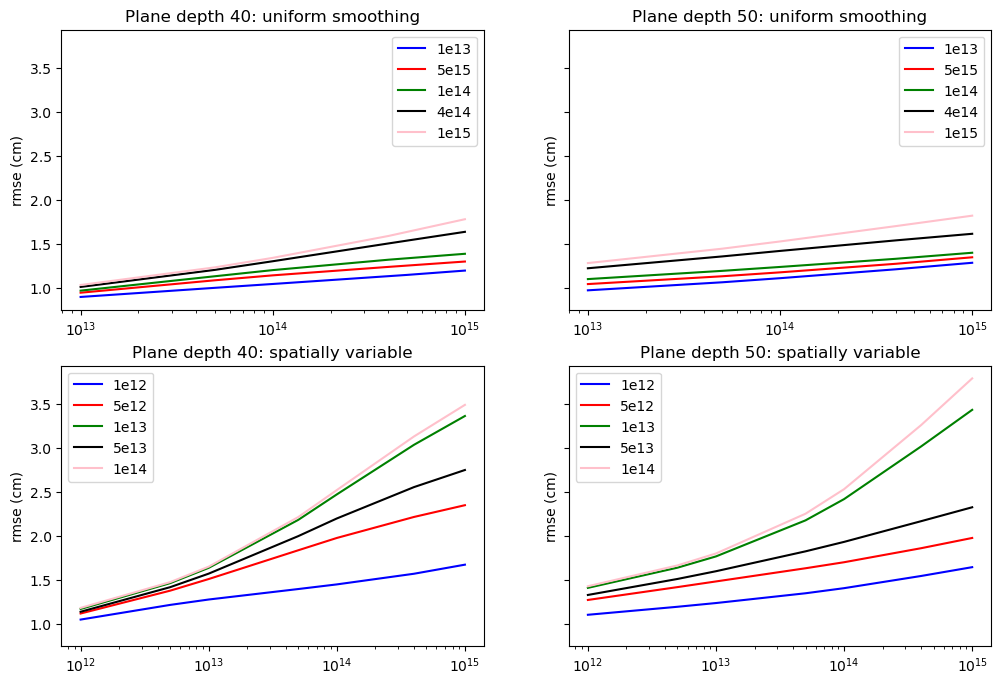

In [13]:
import matplotlib.pyplot as plt

plt.close('all')
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), sharey=True)

ax[0][0].set_title("Plane depth 40: uniform smoothing")
ax[0][0].set_ylabel("rmse (cm)")
ax[0][0].plot(f1e13_models["cmiSmoothing"], f1e13_models["rmse (cm)"], color="blue", label="1e13");
ax[0][0].plot(f5e13_models["cmiSmoothing"], f5e13_models["rmse (cm)"], color="red", label="5e15")
ax[0][0].plot(f1e14_models["cmiSmoothing"], f1e14_models["rmse (cm)"], color="green", label="1e14");
ax[0][0].plot(f4e14_models["cmiSmoothing"], f4e14_models["rmse (cm)"], color="black", label="4e14");
ax[0][0].plot(f1e15_models["cmiSmoothing"], f1e15_models["rmse (cm)"], color="pink", label="1e15");
ax[0][0].set_xscale("log")
ax[0][0].legend()

ax[0][1].set_title("Plane depth 50: uniform smoothing")
ax[0][1].set_ylabel("rmse (cm)")
ax[0][1].plot(f1e13_models2["cmiSmoothing"], f1e13_models2["rmse (cm)"], color="blue", label="1e13");
ax[0][1].plot(f5e13_models2["cmiSmoothing"], f5e13_models2["rmse (cm)"], color="red", label="5e15")
ax[0][1].plot(f1e14_models2["cmiSmoothing"], f1e14_models2["rmse (cm)"], color="green", label="1e14");
ax[0][1].plot(f4e14_models2["cmiSmoothing"], f4e14_models2["rmse (cm)"], color="black", label="4e14");
ax[0][1].plot(f1e15_models2["cmiSmoothing"], f1e15_models2["rmse (cm)"], color="pink", label="1e15");
ax[0][1].set_xscale("log")
ax[0][1].legend()

ax[1][0].set_title("Plane depth 40: spatially variable")
ax[1][0].set_ylabel("rmse (cm)")
ax[1][0].plot(f1e12_models3["cmiSmoothing"], f1e12_models3["rmse (cm)"], color="blue", label="1e12");
ax[1][0].plot(f5e12_models3["cmiSmoothing"], f5e12_models3["rmse (cm)"], color="red", label="5e12")
ax[1][0].plot(f1e13_models3["cmiSmoothing"], f5e13_models3["rmse (cm)"], color="green", label="1e13");
ax[1][0].plot(f5e13_models3["cmiSmoothing"], f1e13_models3["rmse (cm)"], color="black", label="5e13");
ax[1][0].plot(f1e14_models3["cmiSmoothing"], f1e14_models3["rmse (cm)"], color="pink", label="1e14");
ax[1][0].set_xscale("log")
ax[1][0].legend()

ax[1][1].set_title("Plane depth 50: spatially variable")
ax[1][1].set_ylabel("rmse (cm)")
ax[1][1].plot(f1e12_models4["cmiSmoothing"], f1e12_models4["rmse (cm)"], color="blue", label="1e12");
ax[1][1].plot(f5e12_models4["cmiSmoothing"], f5e12_models4["rmse (cm)"], color="red", label="5e12")
ax[1][1].plot(f1e13_models4["cmiSmoothing"], f5e13_models4["rmse (cm)"], color="green", label="1e13");
ax[1][1].plot(f5e13_models4["cmiSmoothing"], f1e13_models4["rmse (cm)"], color="black", label="5e13");
ax[1][1].plot(f1e14_models4["cmiSmoothing"], f1e14_models4["rmse (cm)"], color="pink", label="1e14");
ax[1][1].set_xscale("log")
ax[1][1].legend()

plt.show()


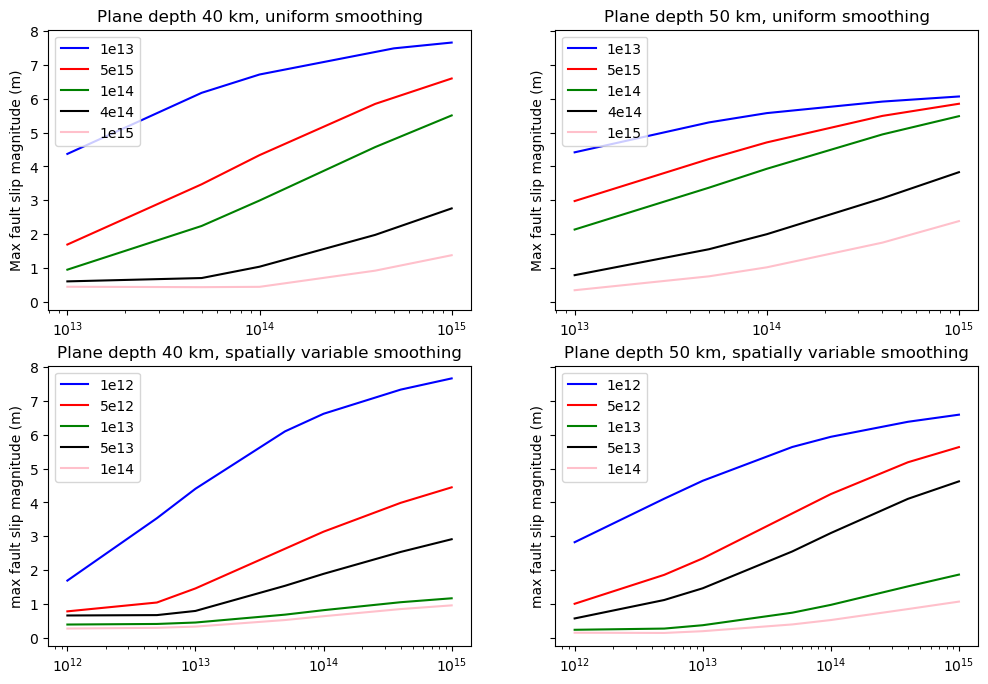

In [5]:

plt.close('all')
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), sharey=True)

ax[0][0].set_title("Plane depth 40 km, uniform smoothing")
ax[0][0].set_ylabel("Max fault slip magnitude (m)")
ax[0][0].plot(f1e13_models["cmiSmoothing"], f1e13_models["faultMaxMag (m)"], color="blue", label="1e13");
ax[0][0].plot(f5e13_models["cmiSmoothing"], f5e13_models["faultMaxMag (m)"], color="red", label="5e15")
ax[0][0].plot(f1e14_models["cmiSmoothing"], f1e14_models["faultMaxMag (m)"], color="green", label="1e14");
ax[0][0].plot(f4e14_models["cmiSmoothing"], f4e14_models["faultMaxMag (m)"], color="black", label="4e14");
ax[0][0].plot(f1e15_models["cmiSmoothing"], f1e15_models["faultMaxMag (m)"], color="pink", label="1e15");
ax[0][0].set_xscale("log")
ax[0][0].legend()

ax[0][1].set_title("Plane depth 50 km, uniform smoothing")
ax[0][1].set_ylabel("Max fault slip magnitude (m)")
ax[0][1].plot(f1e13_models2["cmiSmoothing"], f1e13_models2["faultMaxMag (m)"], color="blue", label="1e13");
ax[0][1].plot(f5e13_models2["cmiSmoothing"], f5e13_models2["faultMaxMag (m)"], color="red", label="5e15")
ax[0][1].plot(f1e14_models2["cmiSmoothing"], f1e14_models2["faultMaxMag (m)"], color="green", label="1e14");
ax[0][1].plot(f4e14_models2["cmiSmoothing"], f4e14_models2["faultMaxMag (m)"], color="black", label="4e14");
ax[0][1].plot(f1e15_models2["cmiSmoothing"], f1e15_models2["faultMaxMag (m)"], color="pink", label="1e15");
ax[0][1].set_xscale("log")
ax[0][1].legend()

ax[1][0].set_title("Plane depth 40 km, spatially variable smoothing")
ax[1][0].set_ylabel("max fault slip magnitude (m)")
ax[1][0].plot(f1e12_models3["cmiSmoothing"], f1e12_models3["faultMaxMag (m)"], color="blue", label="1e12");
ax[1][0].plot(f5e12_models3["cmiSmoothing"], f5e12_models3["faultMaxMag (m)"], color="red", label="5e12")
ax[1][0].plot(f1e13_models3["cmiSmoothing"], f5e13_models3["faultMaxMag (m)"], color="green", label="1e13");
ax[1][0].plot(f5e13_models3["cmiSmoothing"], f1e13_models3["faultMaxMag (m)"], color="black", label="5e13");
ax[1][0].plot(f1e14_models3["cmiSmoothing"], f1e14_models3["faultMaxMag (m)"], color="pink", label="1e14");
ax[1][0].set_xscale("log")
ax[1][0].legend()

ax[1][1].set_title("Plane depth 50 km, spatially variable smoothing")
ax[1][1].set_ylabel("max fault slip magnitude (m)")
ax[1][1].plot(f1e12_models4["cmiSmoothing"], f1e12_models4["faultMaxMag (m)"], color="blue", label="1e12");
ax[1][1].plot(f5e12_models4["cmiSmoothing"], f5e12_models4["faultMaxMag (m)"], color="red", label="5e12")
ax[1][1].plot(f1e13_models4["cmiSmoothing"], f5e13_models4["faultMaxMag (m)"], color="green", label="1e13");
ax[1][1].plot(f5e13_models4["cmiSmoothing"], f1e13_models4["faultMaxMag (m)"], color="black", label="5e13");
ax[1][1].plot(f1e14_models4["cmiSmoothing"], f1e14_models4["faultMaxMag (m)"], color="pink", label="1e14");
ax[1][1].set_xscale("log")
ax[1][1].legend()

plt.show()

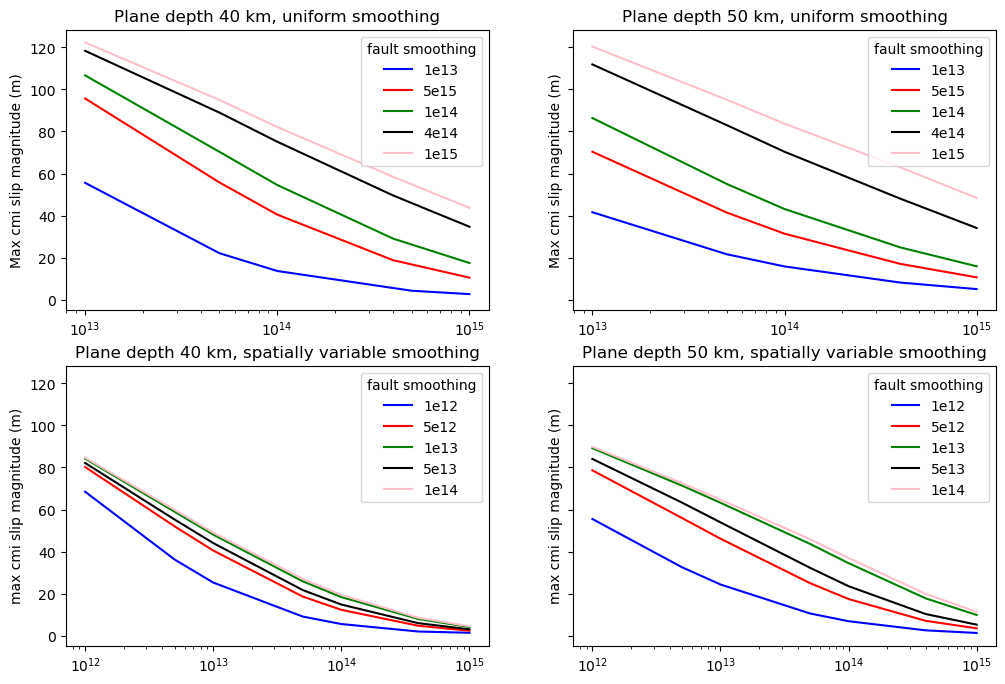

In [10]:
plt.close('all')
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), sharey=True)

ax[0][0].set_title("Plane depth 40 km, uniform smoothing")
ax[0][0].set_ylabel("Max cmi slip magnitude (m)")
ax[0][0].plot(f1e13_models["cmiSmoothing"], f1e13_models["cmiMaxMag (m)"], color="blue", label="1e13");
ax[0][0].plot(f5e13_models["cmiSmoothing"], f5e13_models["cmiMaxMag (m)"], color="red", label="5e15")
ax[0][0].plot(f1e14_models["cmiSmoothing"], f1e14_models["cmiMaxMag (m)"], color="green", label="1e14");
ax[0][0].plot(f4e14_models["cmiSmoothing"], f4e14_models["cmiMaxMag (m)"], color="black", label="4e14");
ax[0][0].plot(f1e15_models["cmiSmoothing"], f1e15_models["cmiMaxMag (m)"], color="pink", label="1e15");
ax[0][0].set_xscale("log")
ax[0][0].legend(title="fault smoothing")

ax[0][1].set_title("Plane depth 50 km, uniform smoothing")
ax[0][1].set_ylabel("Max cmi slip magnitude (m)")
ax[0][1].plot(f1e13_models2["cmiSmoothing"], f1e13_models2["cmiMaxMag (m)"], color="blue", label="1e13");
ax[0][1].plot(f5e13_models2["cmiSmoothing"], f5e13_models2["cmiMaxMag (m)"], color="red", label="5e15")
ax[0][1].plot(f1e14_models2["cmiSmoothing"], f1e14_models2["cmiMaxMag (m)"], color="green", label="1e14");
ax[0][1].plot(f4e14_models2["cmiSmoothing"], f4e14_models2["cmiMaxMag (m)"], color="black", label="4e14");
ax[0][1].plot(f1e15_models2["cmiSmoothing"], f1e15_models2["cmiMaxMag (m)"], color="pink", label="1e15");
ax[0][1].set_xscale("log")
ax[0][1].legend(title="fault smoothing")

ax[1][0].set_title("Plane depth 40 km, spatially variable smoothing")
ax[1][0].set_ylabel("max cmi slip magnitude (m)")
ax[1][0].plot(f1e12_models3["cmiSmoothing"], f1e12_models3["cmiMaxMag (m)"], color="blue", label="1e12");
ax[1][0].plot(f5e12_models3["cmiSmoothing"], f5e12_models3["cmiMaxMag (m)"], color="red", label="5e12")
ax[1][0].plot(f1e13_models3["cmiSmoothing"], f5e13_models3["cmiMaxMag (m)"], color="green", label="1e13");
ax[1][0].plot(f5e13_models3["cmiSmoothing"], f1e13_models3["cmiMaxMag (m)"], color="black", label="5e13");
ax[1][0].plot(f1e14_models3["cmiSmoothing"], f1e14_models3["cmiMaxMag (m)"], color="pink", label="1e14");
ax[1][0].set_xscale("log")
ax[1][0].legend(title="fault smoothing")

ax[1][1].set_title("Plane depth 50 km, spatially variable smoothing")
ax[1][1].set_ylabel("max cmi slip magnitude (m)")
ax[1][1].plot(f1e12_models4["cmiSmoothing"], f1e12_models4["cmiMaxMag (m)"], color="blue", label="1e12");
ax[1][1].plot(f5e12_models4["cmiSmoothing"], f5e12_models4["cmiMaxMag (m)"], color="red", label="5e12")
ax[1][1].plot(f1e13_models4["cmiSmoothing"], f5e13_models4["cmiMaxMag (m)"], color="green", label="1e13");
ax[1][1].plot(f5e13_models4["cmiSmoothing"], f1e13_models4["cmiMaxMag (m)"], color="black", label="5e13");
ax[1][1].plot(f1e14_models4["cmiSmoothing"], f1e14_models4["cmiMaxMag (m)"], color="pink", label="1e14");
ax[1][1].set_xscale("log")
ax[1][1].legend(title="fault smoothing")


plt.show()